# Bank Customer Churn Prediction Using Machine Learning
Presented By Patrick Amwayi September 2022
<hr style="border-top: 50px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Project Description/Goals:
There is concern by banks why customers move from one bank to another. In this regard we need to understand which aspects of service influence customer's decisions to leave. And with this case study, bank management can concentrate their efforts to improve their services to retain customers.
### Business understanding
The goal of this project is to identify key drivers of customer churn and build a neutral model that accurately determine whether they will leave.
For this project, I am going to use bank customer churn to address questions below:
- What are the key factors that affect customer churn?
- How do these factors affect customer churn?
- Which is the best method to predict customer churn?

### Data understanding
The bank customer churn data was obtained from Kaggle open-source dataset. It is stored in a csv file, named as "Bank Customer Churn Prediction.csv". It has 12 columns called features, including 10000 row numbers. The fetures are customer id, credit score, country, gender, age, tenure, balance, number of products purchased through the bank, whether customer has a credit card, whether customer is an active member, estimated salary, and whether customer left the bank.

### Prepare data
For categorical data features country and gender was handled by encoding. After checking the missing values in the dataset, it showed no missing values.

### EDA, modeling
Divided whole dataset into training data and test data.
The overall churn rate is 20%.
I explored the correlation between every features and churn outcome.
I built three machine learning models (Decision Tree, Random Forest and Logistic Regression) to predict the customer churn.

### Evaluate the results
Evaluated the predictions with accuracy and confusion matrix.

<hr style="border-top: 50px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_recall_curve, auc
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import env
import wrangle

<hr style="border-top: 10px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

## I. Acquire Data

In [2]:
## Acquiring the data from the csv file and from wrangle.py
df=wrangle.acquire_bank()

## II. Clean & Prepare Data

In [3]:
#get prepared clean data using my predefined module from wrangle.py 
df=wrangle.prepare_bank(df)

## Takeaways
- The dataset contains 10000 rows and 12 columns
- The datset has no nulls
- The dataset looks clean with all columns lower case and underscores where necessary
- Dataset had unnecessary column - customer_Id that I dropped not needed for analysis
- I did encode categorical columns country and gender

## Split the data

In [4]:
#spliting the data into 60%,20%,20% and checking its shape
#the data is now ready for exploration
#Y(churn) is my target variable
train,validate, test = wrangle.my_train_test_split(df,["y"])

Train= (6000, 16)
Validate= (2000, 16)
Test= (2000, 16)


## III. Exploratory Data Analysis
<hr style="border-top: 50px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Churn overview

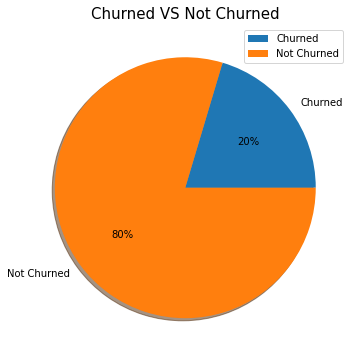

In [5]:
#viz churn vs not churn on a pie chart using my predefined module stored in the wrangle.py file 
wrangle.graph_0(train)

## Univariate Analysis
<hr style="border-top: 10px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

## - Categorical Variables

In [6]:
#categorical variables
num_vars = ['churn']
cat_vars = ['country','gender','active_member', 'credit_card', 'products_number','churn'
           ]

country
France     3027
Germany    1490
Spain      1483
Name: country, dtype: int64
France     50.450000
Germany    24.833333
Spain      24.716667
Name: country, dtype: float64


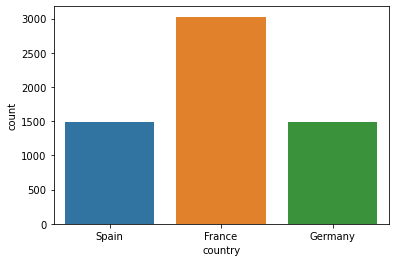

gender
Male      3304
Female    2696
Name: gender, dtype: int64
Male      55.066667
Female    44.933333
Name: gender, dtype: float64


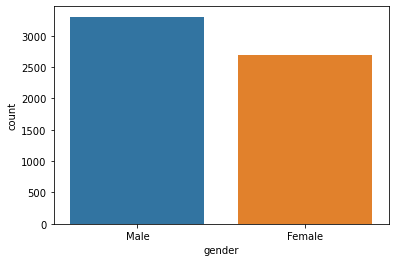

active_member
1    3102
0    2898
Name: active_member, dtype: int64
1    51.7
0    48.3
Name: active_member, dtype: float64


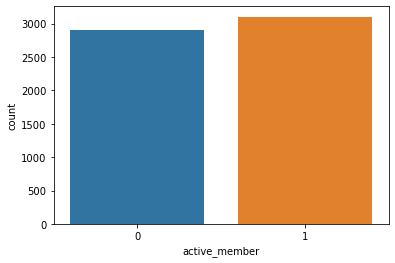

credit_card
1    4234
0    1766
Name: credit_card, dtype: int64
1    70.566667
0    29.433333
Name: credit_card, dtype: float64


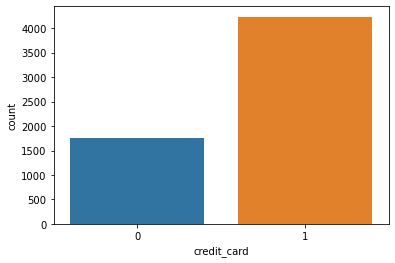

products_number
1    3053
2    2761
3     156
4      30
Name: products_number, dtype: int64
1    50.883333
2    46.016667
3     2.600000
4     0.500000
Name: products_number, dtype: float64


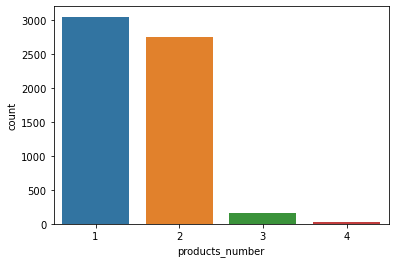

churn
0    4777
1    1223
Name: churn, dtype: int64
0    79.616667
1    20.383333
Name: churn, dtype: float64


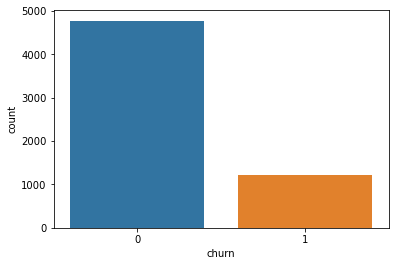

In [7]:
#Analysing categorical variables and their percentages
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

## - Quantitative Variables
<hr style="border-top: 10px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

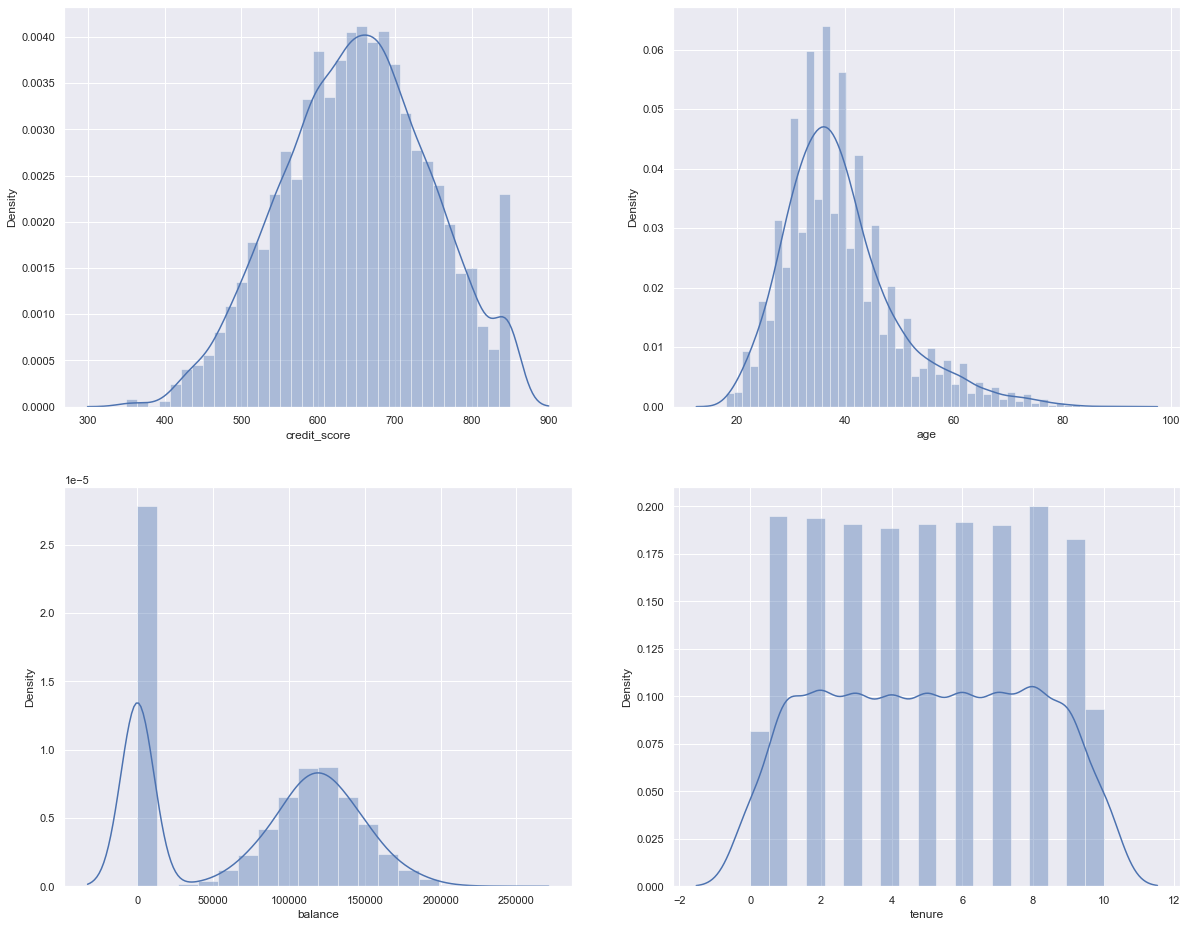

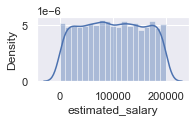

In [8]:
#vizualizing quantitative variables using my predefined module stored in the wrangle.py file
wrangle.plot_quant_vars(train)

## Takeaways:
Looking at our categorical variables:
- We can see that 50% of customers are predominantly from France, and about 25% from Spain and about 25% from Germany
- We can also see that 55% of male customers and 45% female
- We also see 51% active customers while 49% non active members
- we can also verify that most customers 70% have credit card, therefore most transactions are made by credit card
- looking at the variable product_number, we can see that we have more of products 1 and 2 than the rest.
- when we look at our target variable - churn we can see that we have 20% of customers leaving.

Looking at our quantitative variables:
- We can see that our credit score variable has a practically normal distribution
- Credit score observation: most frequency is in 600-700 score range
- A look at the age, most people in our base are between ages 20 and 40 years old
- We can also see on the balance that a large number of people who have no value on the balance sheet
- A look at tenure we can see that it has well distributed values

## Heatmap
<hr style="border-top: 10px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

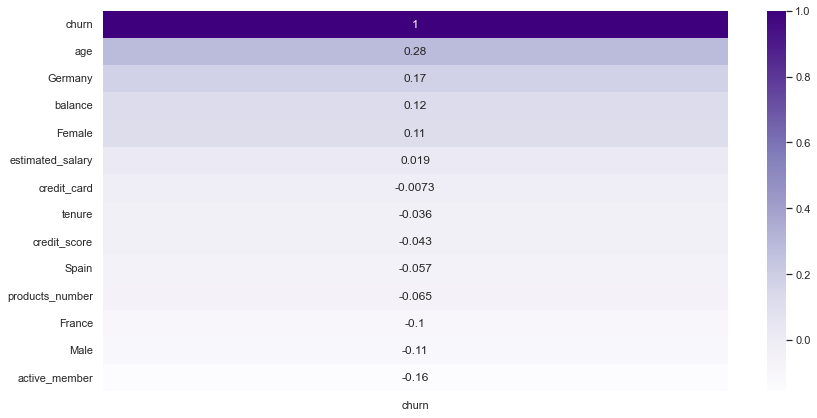

In [9]:
#checking correlation between variables using my predefined module from wrangle.py module
wrangle.graph_1(train)

## Takeaways:

- Here, I analyzed 14 factcors using correlation matrix, which may contribute to the customer churn. The studied factors include credit score, age, tenure, balance, products number, credit card, active member, estimated salary, churn, France, Germany, Spain, Female, Male.

- Result: All the correlation coefficients between the factors and outcome of churn are small. But of all these factors, four factors (age, Germany, balance, Female) show relative strong correlation with the outcome of churn.

## Bivariate Analysis
<hr style="border-top: 10px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

In [10]:
#defining categorical and quantitative variables
cat_vars = ['country','gender','active_member', 'credit_card', 'products_number' ]
target = 'churn'
cat_vars2=['country','gender','active_member', 'credit_card', 'products_number']
quant_var = ['credit_score', 'balance', 'estimated_salary', 'age', 'tenure']

## Do these features have a strong relationship with churn?

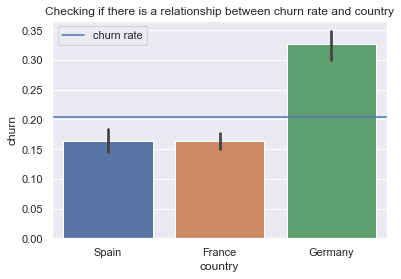

We reject the null hypothesis that country and churn rate are independent
There is a relationship between churn rate and country


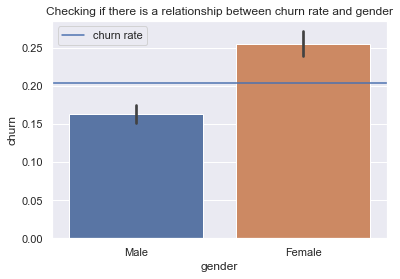

We reject the null hypothesis that gender and churn rate are independent
There is a relationship between churn rate and gender


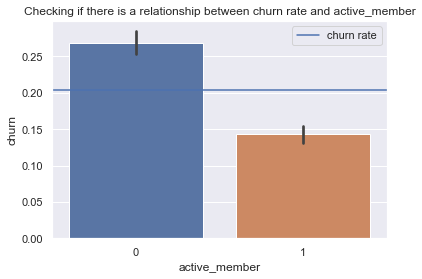

We reject the null hypothesis that active_member and churn rate are independent
There is a relationship between churn rate and active_member


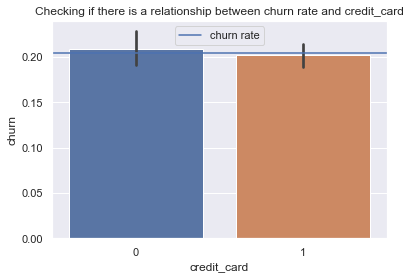

We fail to reject the null hypothesis that credit_card and churn rate are independent
There appears to be no relationship between churn rate and credit_card


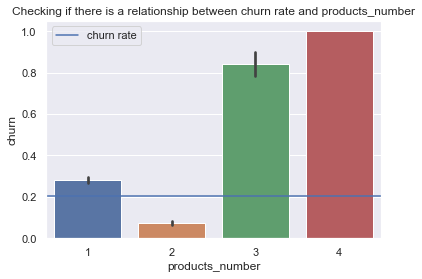

We reject the null hypothesis that products_number and churn rate are independent
There is a relationship between churn rate and products_number


In [11]:
#Let us analyze categorical variables and their relationship to churn using my predefined module stored 
#in the wrangle.py file
#alpha = 0.05
#    Ho = Columns and churn rate are independent
#    Ha = There is a relationship between churn rate and columns

for col in cat_vars:
    wrangle.cat_analysis(train, col)

## Takeaways:
. To address our exploratory questions:

What are the key factors that affect customer churn?

How do these factors affect customer churn?

. As seen from the above plots, we found out that:

- Country: Germany has the highest churn rate compared to other countries Spain and France. This could probably suggest that the Bank has a heavy customer competition in this area. 
- Gender: Female customers are easier to churn than male customers probably because they are high spenders.
- Active member: Non active customers have a high churn rate.
- Credit card: There isn't much significance between customers with and without credit card.
- Product number: Bank product numbers 3 and 4 have a high churn rate, this could suggest that they are not doing well in the market.

## IV. Modeling & Evaluation
<hr style="border-top: 50px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

In [12]:
#getting from wrangle.py my features into X & Y train, validate & test
wrangle.getting_(train,validate,test)

## Establish a Baseline

In [13]:
#X will be features
#y will be our target variable
#these features have high correlation to churn rate
features = ["France","Germany", "Spain", "Male","Female", "balance","age","estimated_salary"]

X_train = train[features]
y_train = train.churn
X_validate = validate[features]
y_validate = validate.churn
X_test = test[features]
y_test = test.churn

In [14]:
#baseline prediction:baseline is the mode value
y_train.value_counts()

0    4777
1    1223
Name: churn, dtype: int64

In [15]:
baseline_accuracy = (y_train == 0).mean()
print('The churn baseline accuracy is:', baseline_accuracy)

The churn baseline accuracy is: 0.7961666666666667


## Model 1: Decision Tree

Accuracy of train: 81.57%
Accuracy of validate: 81.70%


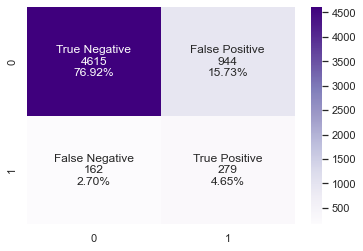

In [16]:
# make the thing
clf = tree.DecisionTreeClassifier(max_depth = 4, random_state = 123)
# fit the thing
clf.fit(X_train, y_train)
# use the thing
pred = clf.predict(X_train)
accuracy_train = clf.score(X_train, y_train)
accuracy_validate = clf.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))
cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
plt.show()

## Model 2: Random Forest

Accuracy of train: 79.62%
Accuracy of validate: 79.65%


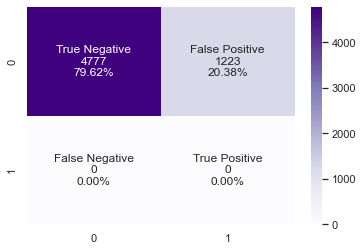

In [17]:
# make the thing 
rf = RandomForestClassifier(min_samples_leaf = 6, max_depth = 3)
# fit the thing
rf.fit(X_train, y_train)
# use the thing
pred = rf.predict(X_train)
accuracy_train = rf.score(X_train, y_train)
accuracy_validate = rf.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))

cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
plt.show()

## Model 3: Logistic Regression

Accuracy of train: 79.62%
Accuracy of validate: 79.65%


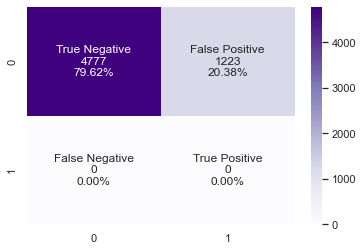

In [18]:
# make the thing 
logit = LogisticRegression() 
# fit the thing
logit.fit(X_train, y_train)
# use the thing
pred = logit.predict(X_train)

accuracy_train = logit.score(X_train, y_train)
accuracy_validate = logit.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))


cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
plt.show()

## Test best Model

In [19]:
# Decision Tree model has the best accuracy of 80.43%, let's do a test on it
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
        .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on test set: 0.81


## Takeaways:

 -To address our exploratory question:
 
 -Which is the best method to predict customer churn?

- When we run the test data, the accuracy for Decision Tree model train is maintained at 81%. Therefore, the model has no data overfit.
-  The best model is Decision Tree Classifier at a depth(4)
- Decision Tree Classifier perform the best with an accuracy of 81% performing 2 percent better than the baseline's 79%.

## Conclusion/Recommendations/Next steps
<hr style="border-top: 10px groove gray; margin-top: 1px; margin-bottom: 1px"></hr>

### Conclusion:
- Customer churn prediction is important to a long-term financial stability of banks. In this project, I successfully created a machine learning model - Decision Tree Classifier that was able to predict customer churn with an accuracy of 81% performing 2 percent better than the baseline's 79%.

- We can conclude that of all the feature age, country, gender and balance had a impact on customer churn.
- Age: Customers at age 30-40 considered as the young are more likely to churn than oder ones, it is also this age bracket that has less than 600 credit score.
- Country: Germany has the highest churn rate compared to other countries Spain and France.
- Gender: Female customers are easier to churn than male customers.
- Balance: Customers with high balances are more likely to churn.

### Recommendations:
- Age: We can see that younger customers are more likely to leave a bank because they are uneducated on building good credit and wealth. Banks should come up with loyalty and retention programs aimed at customers who can still be saved especially customers with poor credit scores given their age, or anyone with a credit score below 600.
- Gender: Since banks are losing more female customers, they need to allocate more resources into pursuing female-oriented promotions such as offering rewards cards and points. Our data evidently shows female are likely to leave because they are bigger spenders and will tend to spend a lot to keep their lifestyles. 


### Next Steps:

- My next step would be to find out how much did our y variable change over the period of 2 years to acquire the right information to do another research.
- I would also like to do a research on Country - Germany and find out why it has the highest churn compared to the rest. Is it because of policies? Do banks have heavy competition?
- I would recommend that in the future we research on age and find out why middle age adult are leaving and find ways to retain them.
- Finally, I would love to check if my recommendations had an impact on our future data.